<a href="https://colab.research.google.com/github/dayan3847/machine_learning/blob/dev%2Fada_boost/ada_boost/colab/dayan_ada_boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ada Boost

## Importando Bibliotecas necesarias para la carga del proyecto

In [1]:
import os
import sys

## Descargando el proyecto de GitHub

In [2]:
# import git proyect machine_learning
if not os.path.isdir('machine_learning'):
    print("Downloading project")
    ! git clone https://github.com/dayan3847/machine_learning
print("Updating Project")
! git -C ./machine_learning checkout dev/ada_boost 
! git -C ./machine_learning fetch
! git -C ./machine_learning rebase

Cloning into 'machine_learning'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 76 (delta 15), reused 74 (delta 13), pack-reused 0
Unpacking objects: 100% (76/76), 14.28 KiB | 585.00 KiB/s, done.
Updating Project
Branch 'dev/ada_boost' set up to track remote branch 'dev/ada_boost' from 'origin'.
Switched to a new branch 'dev/ada_boost'
Current branch dev/ada_boost is up to date.


## Permitir la carga de los ficheros del proyecto

In [3]:
sys.path.insert(0, './machine_learning')

## Importar Clases del proyecto y otras requeridas

In [4]:
from typing import List

from ada_boost.main import AdaBoostMain
from ada_boost.entity import WeakClassifier
from ada_boost.tools import Plotter, Printer

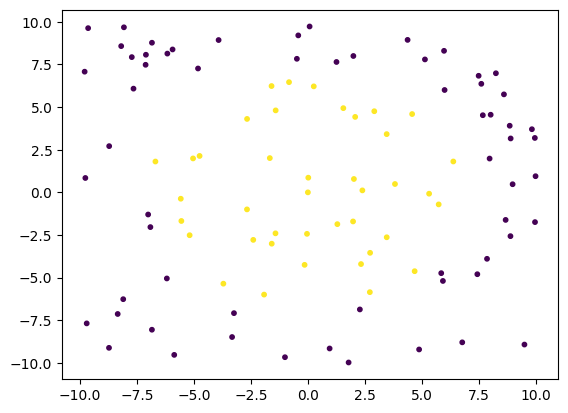

In [6]:
corpus_path: str = './machine_learning/ada_boost/corpus'
ada_boost_main = AdaBoostMain(corpus_path)
data = ada_boost_main.data

plotter: Plotter = Plotter(False)
plotter.plot_data(data)
plotter.show()

In [ ]:
data.normalize()
plotter.plot_data(data)
plotter.show()

In [ ]:
if 'classifier_optimo' not in locals():
    classifier_optimo = None
if 'error_optimo' not in locals():
    error_optimo = None
if 'feature' not in locals():
    feature = 0
if 'threshold' not in locals():
    threshold = 0
threshold += 2
if threshold > 100:
    threshold = 1
    feature += 1

if feature <= 1:
    classifier = WeakClassifier(feature, threshold)
    classifier_error = classifier.fix_polarity(data)

    plotter.plot_data(data)
    plotter.plot_classifier(classifier, '--')

    print('Analizando el clasificador: ')
    Printer.print_classifier(classifier, data)

    if classifier_optimo is None or classifier_error < error_optimo:
        classifier_optimo = classifier
        error_optimo = classifier_error
        print('\033[32m' + 'Nuevo óptimo encontrado' + '\033[0m')

    print('El mejor clasificador en este momento es: ')
    Printer.print_classifier(classifier_optimo, data)
    plotter.plot_classifier(classifier_optimo)

    plotter.show()
else:
    print('El mejor clasificador es: ')
    Printer.print_classifier(classifier_optimo, data)
    plotter.plot_classifier(classifier_optimo)
    plotter.plot_data(data)
    plotter.show()

In [ ]:
ada_boost_main.update_weights(classifier_optimo)

plotter.plot_classifier(classifier_optimo)
plotter.plot_data(data)
plotter.show()

classifiers: List[WeakClassifier] = [classifier_optimo]

In [ ]:
del classifier_optimo
del error_optimo
del feature
del threshold